In [ ]:
!pip install rouge

ROGUE FOR SHORT Q/A

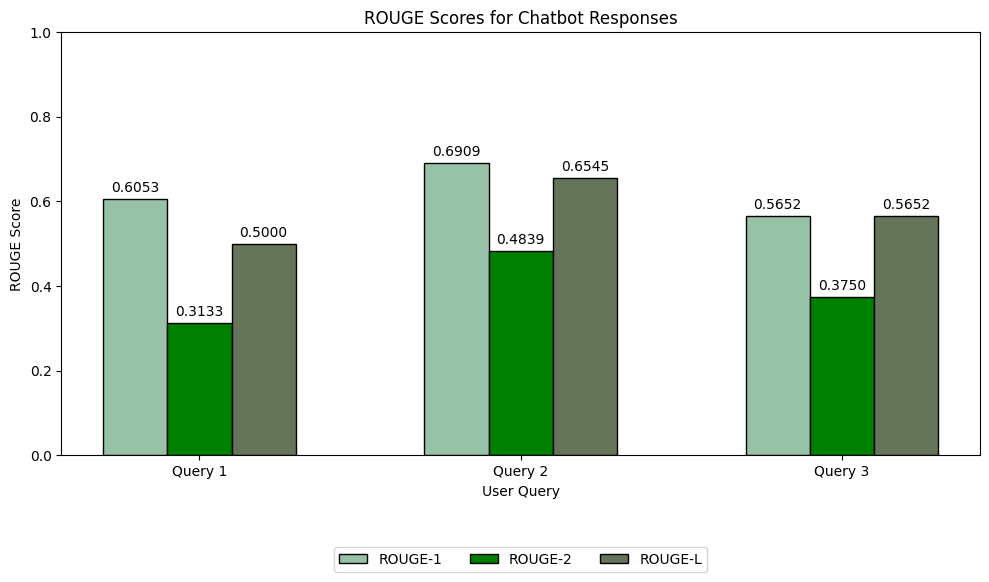

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

# Example data
user_queries = [
    "What is Pod borer (Helicoverpa armigera Hubner)?",
    "What are the suggested seed rates and planting methods for rice?",
    "How can you tell when carrots are ready to be harvested?",
]

ground_truth_responses = [
    "In Bangladesh, the Pod borer (Helicoverpa armigera Hubner) is a significant and severe pest in most chickpea growing regions, causing damage to 30 to 40 percent of pods on average, and resulting in a substantial grain loss of around 400 kg/ha.",
    "The recommended seed rate for rice is 50-60 kg/ha for direct-seeded upland varieties, while for transplanting, it is 8-10 kg/ha when planting one seedling per hill, and 16-20 kg/ha when planting 2-3 seedlings per hill.",
    "Effective irrigation management entails regular monitoring of soil moisture levels, the implementation of drip irrigation techniques, and adjustments to watering schedules in response to prevailing weather conditions.",
]

chatbot_responses = [
    "The Pod borer (Helicoverpa armigera Hubner) is a major and serious pest in most of the chickpea growing areas in Bangladesh. On an average of 30 to 40 per cent pods were found to be damaged by pod borer with 400 kg/ha grain loss.",
    "For rice, the recommended seed rate is 50-60 kg/ha for direct-seeded upland varieties and 8-10 kg/ha for transplanting a single seedling per hill, or 16-20 kg/ha if planting 2-3 seedlings per hill.",
    "Effective irrigation management involves regularly checking soil moisture levels, employing drip irrigation techniques, and modifying watering schedules as dictated by current weather conditions.",
]

# Initialize Rouge scorer
rouge = Rouge()

# Calculate ROUGE scores
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []

for gt_response, chatbot_response in zip(ground_truth_responses, chatbot_responses):
    scores = rouge.get_scores(chatbot_response, gt_response)
    rouge_1_scores.append(scores[0]['rouge-1']['f'])
    rouge_2_scores.append(scores[0]['rouge-2']['f'])
    rouge_l_scores.append(scores[0]['rouge-l']['f'])

# Create a bar plot
x = list(range(len(user_queries)))
width = 0.20

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x, rouge_1_scores, width, color='#98c2a7', label='ROUGE-1', edgecolor='black')
bars2 = ax.bar([i + width for i in x], rouge_2_scores, width, color='green', label='ROUGE-2', edgecolor='black')
bars3 = ax.bar([i + 2 * width for i in x], rouge_l_scores, width, color='#667459', label='ROUGE-L', edgecolor='black')

# Adding the text on the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', va='bottom')

# Set plot labels and title
ax.set_ylim([0, 1])
ax.set_xlabel('User Query')
ax.set_ylabel('ROUGE Score')
ax.set_title('ROUGE Scores for Chatbot Responses')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([f'Query {i+1}' for i in range(len(user_queries))])

# Place the legend at the bottom
ax.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

plt.tight_layout()
plt.show()


ROGUE FOR DESCRIPTIVE Q/A

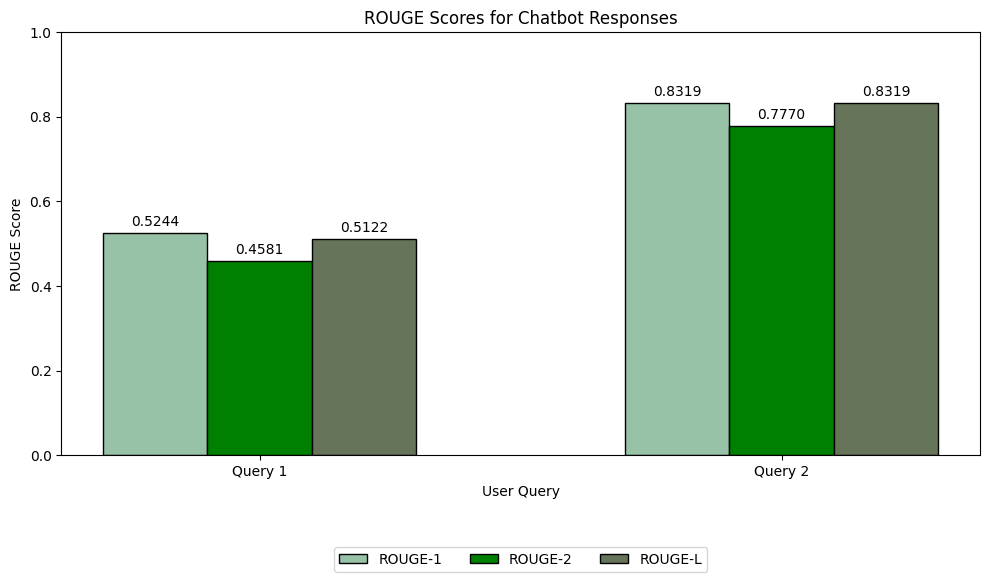

In [ ]:
import matplotlib.pyplot as plt
from rouge import Rouge

# Example data
user_queries = [
    "How is urea super granule (USG) utilized in rice cultivation, and what are its benefits?",
    "What are the Seed preservation methods of Chickpea?",
]

ground_truth_responses = [
    "Urea application: One granule of 1.8 gm of USG is used in Aus and Aman seasons, while one granule of 2.7 gm is used in the Boro season. These granules provide 110 kg urea/ha in Aus and Aman seasons and 165 kg urea/ha in the Boro season. Placement of USG: USG is placed at 7-10 cm deep into the soil at 15-20 and 7-10 DAT during Boro and Aus/Aman seasons, respectively.",
    "Seed preservation methods of Chickpea: Cleaning: The seeds should be cleaned by removing any debris or foreign matter. Drying: The seeds should be dried thoroughly in the sun and the moisture content should be lowered down to 8-9%. Cooling and storage: The dried seeds should be cooled and kept either in sealed polythene bags along with naphthalene balls covered by jute bags, tin containers or airtight earthen pots in storerooms.",
]

chatbot_responses = [
    "Urea application: One grainule of 1.8 gm of USG is used in Aus and Aman seasons, while one grainule of 2.7 gm is used in the Boro season. These grainules provide 110 kg urea/ha in Aus and Aman seasons and 165 kg urea/ha in the Boro season. 2. Placement of USG: USG is placed at 7-10 cm deep into the soil at 15-20 and 7-10 DAT during Boro and Aus and Aman seasons, respectively. 3. Irrigation: Rice can be grown without continuous standing, and urea super granules are used to improve the use of urea. A crop after transplanting may need irrigation twice a week and later once a week. Adequate moisture supply during flowering and seed development are necessary to obtain high seed yield. 4. Intercultural Operation: Shallow hoeing should be done in order to remove weeds and loose the soil for better aeration to facilitate better root growth. 5. Pest Management: Major insects and control measures include the removal and destruction of all the remnants, stubbles, debris, and crop residues after the harvest. IPM approach is used in the field to control insects and larvae.",
    "The seed preservation methods of Chickpea are as follows: Cleaning: The seeds should be cleaned by removing any debris or foreign matter. Drying: The seeds should be dried thoroughly in the sun and the moisture content should be lowered down to 8-9%. Cooling: The dried seeds should be cooled and kept either in sealed polythene bags along with naphthalene balls covered by jute bags, tin containers or air tight earthen pots in storerooms. Storage: The seeds should be stored in dry and above the ground place.",
]

# Initialize Rouge scorer
rouge = Rouge()

# Calculate ROUGE scores
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []

for gt_response, chatbot_response in zip(ground_truth_responses, chatbot_responses):
    scores = rouge.get_scores(chatbot_response, gt_response)
    rouge_1_scores.append(scores[0]['rouge-1']['f'])
    rouge_2_scores.append(scores[0]['rouge-2']['f'])
    rouge_l_scores.append(scores[0]['rouge-l']['f'])

# Create a bar plot
x = list(range(len(user_queries)))
width = 0.20

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x, rouge_1_scores, width, color='#98c2a7', label='ROUGE-1', edgecolor='black')
bars2 = ax.bar([i + width for i in x], rouge_2_scores, width, color='green', label='ROUGE-2', edgecolor='black')
bars3 = ax.bar([i + 2 * width for i in x], rouge_l_scores, width, color='#667459', label='ROUGE-L', edgecolor='black')

# Adding the text on the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', va='bottom')

# Set plot labels and title
ax.set_ylim([0, 1])
ax.set_xlabel('User Query')
ax.set_ylabel('ROUGE Score')
ax.set_title('ROUGE Scores for Chatbot Responses')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([f'Query {i+1}' for i in range(len(user_queries))])

# Place the legend at the bottom
ax.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

plt.tight_layout()
plt.show()


ROGUE FOR CONTEXUAL Q/A

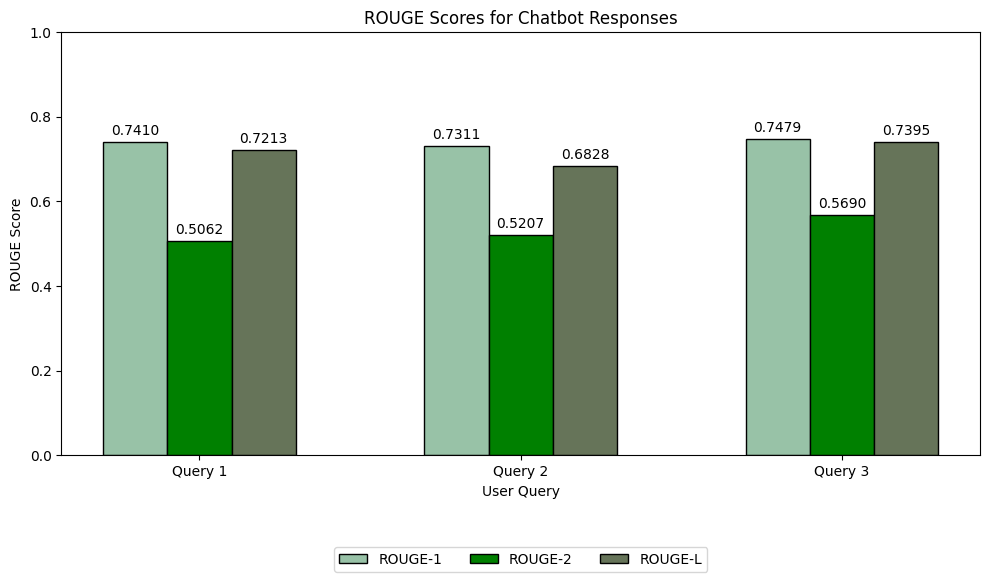

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

# Example data
user_queries = [
    "What could be the reasons behind the sudden weakening and pale appearance of the basil plants, and what steps can the home gardener take to address this issue and encourage healthy growth?",
    "What are the possible reasons for the wilting and limp condition of the lettuce crops in the rooftop garden, and what measures should the gardeners take to revive the affected plants and prevent future occurrences?",
    "What could be causing the yellowing and spotting of the tomato plant leaves in the community garden, and what immediate steps should the gardeners take to address this issue?"

]

ground_truth_responses = [

    "Causes of the weakened and pale appearance of basil plants include: Viral disease, which can be identified by the presence of light yellowish spots on young leaves, leading to stunted growth, pale leaves, and mosaic patterns. Fungal disease, characterized by cracking, browning, and swelling on stems and leaves, can also cause mosaic spots, leaf curling, and stunted growth. Additionally, bacterial diseases can exhibit similar symptoms as viral and fungal diseases, spreading through contaminated tools, water, or soil. To address the issue, home gardeners can take the following steps: Isolate affected plants to prevent disease spread. Inspect leaves for signs of disease, such as yellow spots, mosaic patterns, or curling. Treat with an appropriate fungicide or antiviral if a fungal disease is identified. Remove and destroy infected leaves or parts of leaves to prevent disease spread. Regularly sanitize tools and equipment to prevent disease transmission. Ensure plants receive adequate moisture to prevent dehydration and disease. Provide support with stakes or trellises if stems are weak. Rotate basil plants with other vegetables or flowers to reduce disease risk. Use organic pest control methods, such as insecticidal soap or neem oil, to control pests and diseases. If the problem persists, seek professional help from a gardening expert or veterinarian for proper diagnosis and treatment.",
    "Reasons of the wilting and limp condition of the lettuce crops in the rooftop garden include: Bacterial wilt, which is a common disease in Bangladesh, characterized by dark vascular strands and a slimy exudate, and may be caused by Ralstonia solanacearum. Nutrient deficiency, as lettuce requires specific nutrients like nitrogen, phosphorus, and potassium for optimal growth, and a lack of these nutrients can lead to wilting. Soil issues, such as nutrient deficiencies, compacted soil, or poor drainage, which can restrict water and nutrient uptake, resulting in wilting. Environmental stressors, including excessive heat, cold, drought, or poor air quality, which can also contribute to the wilting of lettuce plants. To revive the affected plants and prevent future occurrences, the following measures can be taken: Isolate affected plants to prevent disease spread. Regularly sanitize tools and equipment to prevent the spread of bacteria or other pathogens. Ensure proper nutrition by adding fertilizers according to soil test results. Address soil issues by amending the soil with compost or other organic matter to improve drainage and nutrient content. Control environmental stressors by addressing excessive heat, drought, or other stressors. Consider using resistant lettuce varieties that are less susceptible to bacterial wilt. Regularly monitor the health of the plants for signs of disease or nutrient deficiencies. If the problem persists, seek professional help from a local agricultural extension service or a qualified gardening professional for further diagnosis and guidance.",
    "Main issues for the yellowing and spotting of tomato plant leaves include: Nutrient deficiency, which can be identified by the presence of light yellowish spots on young leaves, potentially indicating a lack of nitrogen or potassium. Viral disease, characterized by short, narrow, and yellow mosaic spots, consistent with viral infection. Bacterial disease, such as Rhizoctonia, which can cause similar symptoms. To address the issue, the gardeners should take the following immediate steps: Inspect the leaves for signs of disease, such as yellow spots, mosaic patterns, or curling. Identify the underlying cause of the yellowing and spotting, whether it's a nutrient deficiency, viral disease, or bacterial disease. Treat the plants accordingly: provide necessary nutrients according to soil test results for nutrient deficiency, use an appropriate antiviral treatment for viral disease, or apply appropriate antibiotics or fungicides for bacterial disease. Prevent future occurrences by ensuring proper watering and fertilization practices to provide adequate nutrients, using disease-resistant tomato varieties, or considering organic pest control methods. Regularly monitor the health of the tomato plants and take necessary actions to address any emerging issues."
]

chatbot_responses = [
    "Possible reasons for the weakened and pale appearance of basil plants: Viral disease: The presence of light yellowish spots on the young leaves suggests the possibility of a viral disease. Viruses can cause stunted growth, pale leaves, and mosaic patterns on basil plants. Fungal disease: The presence of cracking, browning, and swelling on the stems and leaves could indicate a fungal disease. Fungi can cause a range of symptoms, including mosaic spots, leaf curling, and stunted growth. Bacterial disease: Bacterial diseases can also cause similar symptoms as viral and fungal diseases. Bacterial infections can spread through contaminated tools, water, or soil. Steps the home gardener can take to address the issue: Isolate the affected plants: Remove and isolate any infected plants to prevent the spread of disease to other healthy plants. Inspect the leaves: Examine the leaves for signs of disease, such as yellow spots, mosaic patterns, or curling. Treat with appropriate fungicide or antiviral: If a fungal disease is identified, treat the affected leaves with an appropriate fungicide or antiviral. Remove infected leaves: Remove and destroy any infected leaves or parts of leaves to prevent the spread of disease. Sanitize tools and equipment: Regularly clean and disinfect tools and equipment used in gardening to prevent the spread of disease. Provide adequate moisture: Ensure that the plants receive adequate moisture, as this can help prevent dehydration and disease. Provide support: If the stems are weak, provide support with stakes or trellises to help them stay upright. Rotate crops: Rotate basil plants with other vegetables or flowers to reduce the risk of disease spread. Use organic methods: Use organic pest control methods such as insecticidal soap or neem oil to control pests and diseases. Seek professional help: If the problem persists or if the plants are severely affected, it is recommended to seek professional help from a gardening expert or a veterinarian for proper diagnosis and treatment.",
    "Possible reasons for the wilting and limp condition of the lettuce crops in the rooftop garden: Bacterial wilt: Bacterial wilt caused by Ralstonia solanacearum is a common disease in Bangladesh, and the presence of the pathogen cannot be ruled out. The symptoms of bacterial wilt, such as dark vascular strands and a slimy exudate, are consistent with the disease. Nutrient deficiency: Lettuce requires specific nutrients for optimal growth, including nitrogen, phosphorus, and potassium. If these nutrients are deficient or insufficient, the plants may exhibit symptoms like wilting. Soil issues: The gardeners should consider the possibility of soil issues such as nutrient deficiencies, compacted soil, or poor drainage. These issues can restrict water and nutrient uptake, leading to wilting. Environmental stressor: The gardeners should also investigate any environmental stressors that may be affecting the lettuce plants. These stressors could include excessive heat, cold, drought, or poor air quality. Measures to revive the affected plants and prevent future occurrences: Isolate the affected plants: Remove and isolate the affected plants to prevent the spread of the disease to other healthy plants. Sanitize tools and equipment: Regularly disinfect tools and equipment used in the garden to prevent the spread of bacteria or other pathogens. Provide proper nutrition: Ensure the lettuce plants receive adequate nutrients by adding fertilizers according to the soil test results. Address soil issues: Amend the soil with compost or other organic matter to improve drainage and nutrient content. Control environmental stressors: Address any environmental stressors that may be affecting the plants, such as excessive heat or drought. Use resistant lettuce varieties: Consider using resistant lettuce varieties that are known to be less susceptible to bacterial wilt. Monitor the health of the plants: Regularly inspect the lettuce plants for signs of disease or nutrient deficiencies. Seek professional help: If the problem persists or if the plants are severely affected, consult a local agricultural extension service or a qualified gardening professional for further diagnosis and guidance." ,
    "Possible causes of the yellowing and spotting of tomato plant leaves: Nutrient deficiency: The presence of light yellowish spots on the young leaves could indicate a nutrient deficiency, such as nitrogen or potassium deficiency. Viral disease: The symptoms of the disease, such as short, narrow and yellow mosaic spots, are consistent with viral infection.  Bacterial disease: Bacterial diseases, such as Rhizoctonia, can cause similar symptoms. Immediate steps the gardeners should take to address the issue:  1. Inspect the leaves: Examine the leaves for signs of disease, such as yellow spots, mosaic patterns, or curling.  2. Identify the cause: Determine the underlying cause of the yellowing and spotting, whether it's a nutrient deficiency, viral disease, or bacterial disease.  3. Treatment: о for nutrient deficiency, provide the necessary nutrients according to the soil test results. For viral disease, use an appropriate antiviral treatment.  for bacterial disease, use appropriate antibiotics or fungicides. 4. Prevention: о Ensure proper watering and fertilization practices to provide the plants with adequate nutrients.  Use disease-resistant tomato varieties or consider using organic pest control methods. 5. Monitor the plants: Regularly monitor the health of the tomato plants and take necessary actions to address any emerging issues."

]

# Initialize Rouge scorer
rouge = Rouge()

# Calculate ROUGE scores
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []

for gt_response, chatbot_response in zip(ground_truth_responses, chatbot_responses):
    scores = rouge.get_scores(chatbot_response, gt_response)
    rouge_1_scores.append(scores[0]['rouge-1']['f'])
    rouge_2_scores.append(scores[0]['rouge-2']['f'])
    rouge_l_scores.append(scores[0]['rouge-l']['f'])

# Create a bar plot
x = list(range(len(user_queries)))
width = 0.20

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x, rouge_1_scores, width, color='#98c2a7', label='ROUGE-1', edgecolor='black')
bars2 = ax.bar([i + width for i in x], rouge_2_scores, width, color='green', label='ROUGE-2', edgecolor='black')
bars3 = ax.bar([i + 2 * width for i in x], rouge_l_scores, width, color='#667459', label='ROUGE-L', edgecolor='black')

# Adding the text on the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', va='bottom')

# Set plot labels and title
ax.set_ylim([0, 1])
ax.set_xlabel('User Query')
ax.set_ylabel('ROUGE Score')
ax.set_title('ROUGE Scores for Chatbot Responses')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([f'Query {i+1}' for i in range(len(user_queries))])

# Place the legend at the bottom
ax.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

plt.tight_layout()
plt.show()